In [65]:
#Import Dependencies
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [66]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [67]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [68]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [69]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [70]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [71]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [72]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [73]:
inspector = inspect(engine)

# measureemnt column
columns = inspector.get_columns("measurement")
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [74]:
# station column
columns= inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [81]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [83]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()


# Calculate the date one year from the last date in data set.

one_year_ago = dt.date(2017,8,23) - dt.timedelta(days= 365)
print(one_year_ago)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).filter(Measurement.prcp != None).\
    order_by(Measurement.date).all()



2016-08-23


In [77]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(results, columns = ["Date", "Precipitation"])

# Sort the dataframe by date
df.set_index("Date", inplace=True)
df.head()




,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


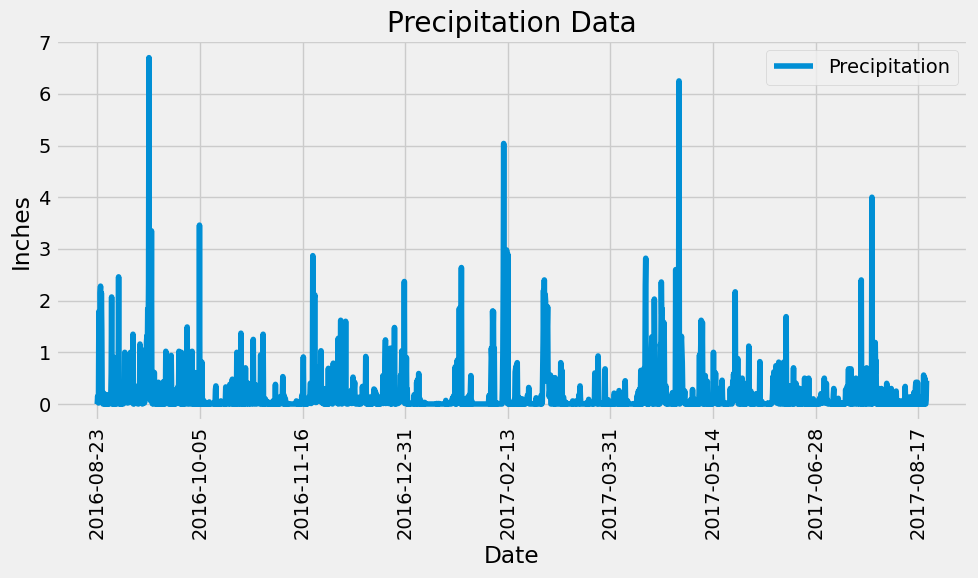

In [78]:
#Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("Images/PrecipitationData.png")
plt.show()


In [32]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df.describe()
summary_stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number of stations in the dataset
total_number_stations = session.query(Station).distinct().count()
total_number_stations

9

In [40]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station_counts = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()
active_station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [50]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').\
                order_by(func.min(Measurement.tobs)).all()
temp_results


[(54.0, 85.0, 71.66378066378067)]

In [60]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temp = session.query(Measurement.tobs).\
            filter(Measurement.date >= one_year_ago).filter(Measurement.station == 'USC00519281').\
            order_by(Measurement.tobs).all()



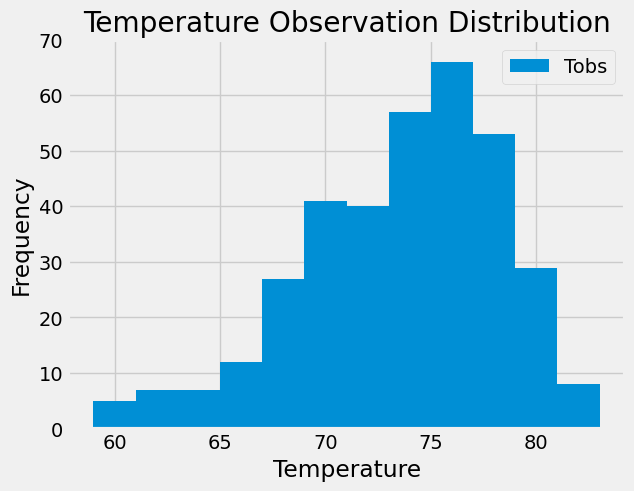

In [79]:
# plot the results as a histogram
df = pd.DataFrame(year_temp, columns = ['Tobs'])

df.plot.hist(bins=12)
plt.ylim(0,70)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observation Distribution')
plt.savefig("Images/TemperatureDistribution.png")
plt.show()

# Close Session

In [80]:
# Close Session
session.close()